Import Library

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load dataset

In [56]:
data = pd.read_csv('dataset_buys_comp.csv')

In [57]:
data.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


Preprocessing

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [59]:
data.describe()

,Buys_Computer
count,1000.000000
mean,0.669000
std,0.470809
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


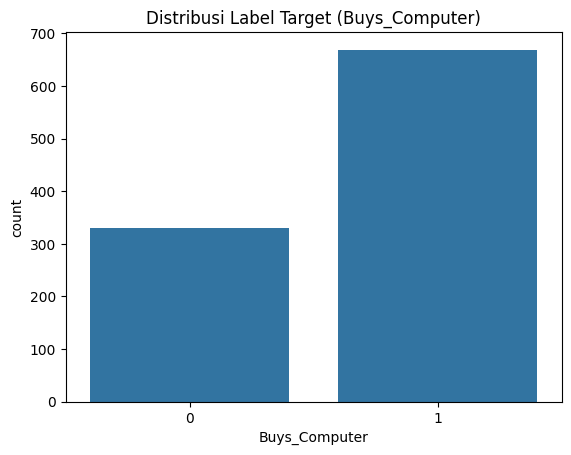

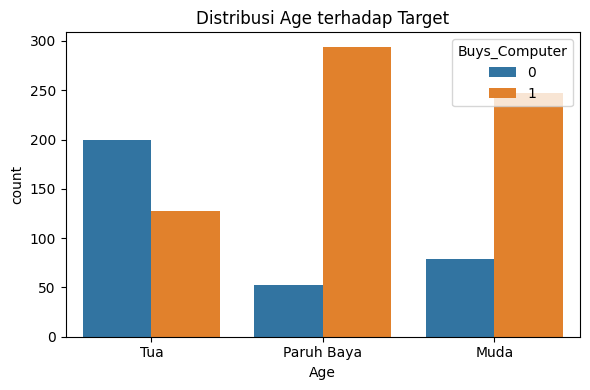

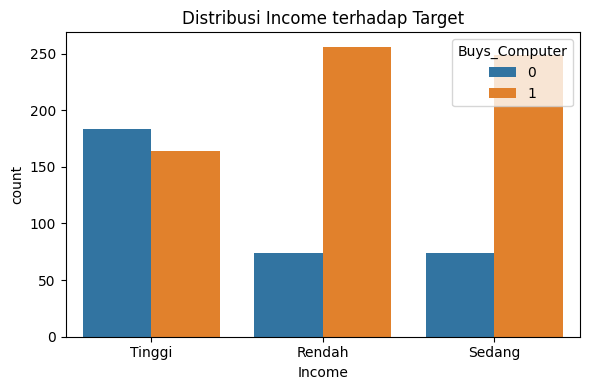

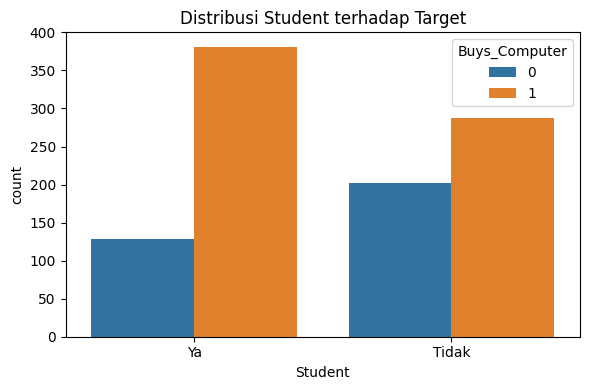

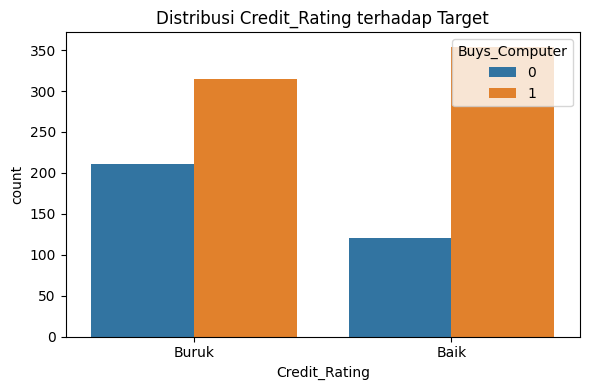

In [60]:
# Distribusi kelas target
sns.countplot(data=data, x='Buys_Computer')
plt.title("Distribusi Label Target (Buys_Computer)")
plt.show()

# Distribusi fitur terhadap target
categorical_features = ['Age', 'Income', 'Student', 'Credit_Rating']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature, hue='Buys_Computer')
    plt.title(f"Distribusi {feature} terhadap Target")
    plt.legend(title='Buys_Computer', loc='upper right')
    plt.tight_layout()
    plt.show()


Label encoding

In [61]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [62]:
data.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,2,2,1,1,0
1,1,2,1,0,1
2,1,0,0,1,1
3,2,0,0,0,1
4,2,0,1,0,1


Pisahkan fitur dan target

In [63]:
X = data.drop('Buys_Computer', axis=1)
y = data['Buys_Computer']

Split data train-test

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Buat model

In [65]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Prediksi dan evaluasi

In [66]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Tidak Layak", "Layak"]))

Accuracy: 0.74

Confusion Matrix:
[[ 28  43]
 [  9 120]]

Classification Report:
              precision    recall  f1-score   support

 Tidak Layak       0.76      0.39      0.52        71
       Layak       0.74      0.93      0.82       129

    accuracy                           0.74       200
   macro avg       0.75      0.66      0.67       200
weighted avg       0.74      0.74      0.71       200

